# **Import Required Libraries**

In [56]:
import numpy as np
import tensorflow as tf
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM, Embedding
from keras.layers.core import Dense, Activation
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

# **Read Data**

Data Source: https://www.gutenberg.org/ebooks/1661.html.images

In [57]:
path = 'drive/MyDrive/Next word Prediction/data.txt'
text = open(path).read().lower()
print('corpus length:', len(text))

corpus length: 581887


# **Tokenization**

In [58]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)
words = [word for word in words if "_" not in word]

# **Feature Engineering**

In [59]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [60]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


Label data into x and y

In [61]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

# **Build Model**

In [62]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

# **Training Model**

In [ ]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=20, shuffle=True).history

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
810/810 [==============================] - 19s 16ms/step - loss: 5.9899 - accuracy: 0.1089 - val_loss: 6.9700 - val_accuracy: 0.1028
Epoch 2/20
810/810 [==============================] - 12s 14ms/step - loss: 5.7501 - accuracy: 0.1485 - val_loss: 7.7963 - val_accuracy: 0.1034
Epoch 3/20
810/810 [==============================] - 12s 15ms/step - loss: 5.7347 - accuracy: 0.1765 - val_loss: 8.1302 - val_accuracy: 0.1094
Epoch 4/20
810/810 [==============================] - 12s 15ms/step - loss: 5.4441 - accuracy: 0.2112 - val_loss: 8.0764 - val_accuracy: 0.0979
Epoch 5/20
810/810 [==============================] - 12s 15ms/step - loss: 5.1364 - accuracy: 0.2504 - val_loss: 8.4669 - val_accuracy: 0.0973
Epoch 6/20
810/810 [==============================] - 12s 15ms/step - loss: 4.8793 - accuracy: 0.2921 - val_loss: 8.5020 - val_accuracy: 0.0874
Epoch 7/20
810/810 [==============================] - 13s 16ms/step - loss: 4.6598 - accuracy: 0.3351 - val_loss: 8.6653 - val_accuracy:

In [ ]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

# **Evaluating the Next Word Prediction Model**

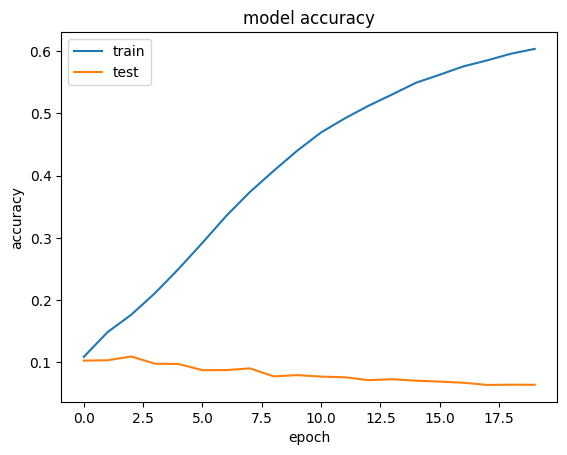

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

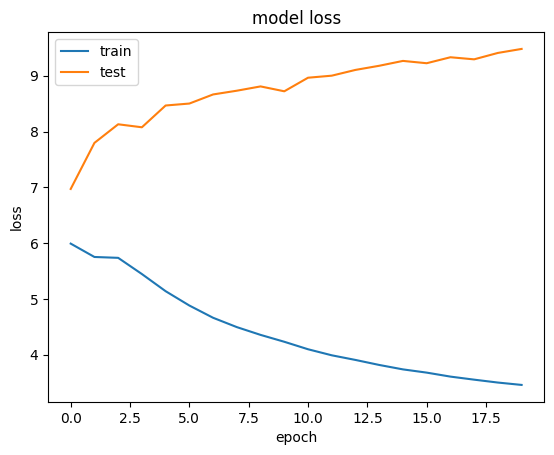

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 

# **Test Model**

In [ ]:
texts = [
    "It is not a lack",
    "That which does not kill",
    "I not upset that you",
    "And those who were seen",
    "It is hard enough to",
    "To Sherlock Holmes she is",
    "They were admirable things for"

]

In [ ]:
def predict_next_word(input_text, n_best):
    input_text = input_text.lower()
    X = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for i, word in enumerate(input_text.split()):
        X[0, i, unique_word_index[word]] = 1
        
    predictions = model.predict(X)[0]
    return [unique_words[idx] for idx in np.argpartition(predictions, -n_best)[-n_best:]]

In [ ]:
possible = predict_next_word("I will have to look", 5)

1/1 [==============================] - 0s 359ms/step


In [ ]:
possible

['mr', 'before', 'at', 'and', 'what']

In [ ]:
for text in texts:
  print(predict_next_word(text, 10))

1/1 [==============================] - 0s 36ms/step
['all', 'woman', 'way', 'man', 'or', 'looking', 'but', 'which', 'very', 'one']
1/1 [==============================] - 0s 29ms/step
['your', 'my', 'his', 'an', 'be', 'the', 'much', 'a', 'there', 'it']
1/1 [==============================] - 0s 27ms/step
['should', 'had', 'can', 'all', 'must', 'would', 'might', 'could', 'are', 'will']
1/1 [==============================] - 0s 26ms/step
['they', 'in', 'of', 'himself', 'very', 'by', 'little', 'there', 'he', 'more']
1/1 [==============================] - 0s 36ms/step
['but', 'go', 'it', 'room', 'say', 'take', 'find', 'think', 'tell', 'you']
1/1 [==============================] - 0s 32ms/step
['gone', 'made', 'always', 'should', 'quite', 'my', 'no', 'a', 'an', 'not']
1/1 [==============================] - 0s 27ms/step
['being', 'he', 'it', 'my', 'the', 'some', 'this', 'his', 'a', 'any']
